# COMP2002 Jupyter Notebook Template
Jupyter Notebook for the 70% Coursework for COMP2002.

Task 1.1 - Data Preparation

In [85]:
#Add all imports here
from sklearn.model_selection import cross_val_score
import pandas
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

In [86]:
#Data preparation
columnNames = ["X1","X2","X3","X4","X5","X6","X7","X8","Y1","Y2"]
data = pandas.read_excel("COMP2002Data.xlsx", names = columnNames)
values = data.values
inputs = values[:,:8].astype(float)
targets = values[:,8:].astype(float)
scaler = MinMaxScaler()
scaled = scaler.fit_transform(inputs)
X_train, X_test, Y_train, Y_test = train_test_split(scaled, targets)

Task 1.2 - Regression

Random Forest

In [87]:
#RandomForestGenerator regressor code

regressorRandomForest = RandomForestRegressor(max_depth=20)
regressorRandomForest.fit(X_train, Y_train)
Y_pred = regressorRandomForest.predict(X_test)

Y_pred

#End of RandomForestGenerator regressor code

array([[23.6581 , 26.748  ],
       [ 6.20732, 11.1855 ],
       [36.1754 , 37.132  ],
       [11.2708 , 14.0767 ],
       [10.2519 , 13.5862 ],
       [16.5907 , 16.3669 ],
       [11.3346 , 13.8824 ],
       [40.3721 , 39.6543 ],
       [12.3087 , 15.4269 ],
       [25.8925 , 30.2637 ],
       [18.8235 , 23.6173 ],
       [ 6.21228, 11.1493 ],
       [29.2576 , 28.8041 ],
       [12.4004 , 15.0666 ],
       [32.4808 , 34.7768 ],
       [23.429  , 27.1072 ],
       [16.8758 , 19.9755 ],
       [32.6155 , 33.4706 ],
       [10.7518 , 13.9055 ],
       [12.3173 , 14.9282 ],
       [14.2109 , 16.4045 ],
       [28.6049 , 32.0552 ],
       [32.3617 , 32.9087 ],
       [29.2277 , 31.7515 ],
       [36.1489 , 39.3565 ],
       [32.3307 , 33.1875 ],
       [39.086  , 42.2213 ],
       [12.99   , 14.2669 ],
       [12.1415 , 14.8639 ],
       [14.5639 , 16.7881 ],
       [12.7857 , 14.0413 ],
       [39.3373 , 42.4684 ],
       [14.5228 , 15.2068 ],
       [32.2268 , 32.7694 ],
       [26.587

In [88]:
#NeuralNetwork regressor code

regressorMLP = MLPRegressor(max_iter=16000)
regressorMLP.fit(X_train, Y_train)
Y_pred = regressorMLP.predict(X_test)

#End of NeuralNetwork regressor code

In [89]:
#SVR Regressor Code

regressorSVR = SVR(max_iter=10000)
regressorSVR2 = SVR(max_iter=10000)
regressorSVR.fit(X_train,Y_train[:,0])
regressorSVR2.fit(X_train,Y_train[:,1])
Y_pred = regressorSVR.predict(X_test)
X_pred = regressorSVR2.predict(X_test)

#End of SVR Regressor code

Task 1.3 - Cross Validation

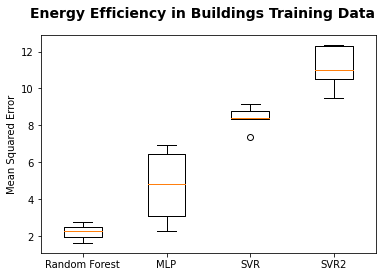

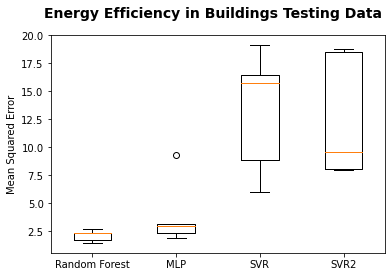

In [90]:
#Cross validation for each of the training scores
scoresRandomForest = cross_val_score(regressorRandomForest, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
scoresMLP = cross_val_score(regressorMLP, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
scoresSVR = cross_val_score(regressorSVR, X_train, Y_train[:,0], cv=5, scoring='neg_mean_squared_error')
scoresSVR2 = cross_val_score(regressorSVR2, X_train, Y_train[:,1], cv=5, scoring='neg_mean_squared_error')
#Making all the training validation positive
scoresRandomForest = np.abs(scoresRandomForest)
scoresMLP = np.abs(scoresMLP)
scoresSVR = np.abs(scoresSVR)
scoresSVR2 = np.abs(scoresSVR2)
#Cross validation for each of the testing scores
test_scoresRandomForest = cross_val_score(regressorRandomForest, X_test, Y_test, cv=5, scoring='neg_mean_squared_error')
test_scoresMLP = cross_val_score(regressorMLP, X_test, Y_test, cv=5, scoring='neg_mean_squared_error')
test_scoresSVR = cross_val_score(regressorSVR, X_test, Y_test[:,0], cv=5, scoring='neg_mean_squared_error')
test_scoresSVR2 = cross_val_score(regressorSVR2, X_test, Y_test[:,1], cv=5, scoring='neg_mean_squared_error')

#Making all the testing validation positive
test_scoresRandomForest = np.abs(test_scoresRandomForest)
test_scoresMLP = np.abs(test_scoresMLP)
test_scoresSVR = np.abs(test_scoresSVR)
test_scoresSVR2 = np.abs(test_scoresSVR2)

###Plotting the training validation data onto a boxplot

plt.boxplot([scoresRandomForest, scoresMLP, scoresSVR, scoresSVR2])
plt.suptitle('Energy Efficiency in Buildings Training Data', fontsize=14, fontweight='bold')
plt.ylabel('Mean Squared Error')
plt.xticks([1,2,3,4], ['Random Forest', 'MLP', 'SVR', 'SVR2'])
plt.show()

###Plotting the testing validation data onto a boxplot
plt.boxplot([test_scoresRandomForest, test_scoresMLP, test_scoresSVR, test_scoresSVR2])
plt.suptitle('Energy Efficiency in Buildings Testing Data', fontsize=14, fontweight='bold')
plt.ylabel('Mean Squared Error')
plt.xticks([1,2,3,4], ['Random Forest', 'MLP', 'SVR', 'SVR2'])
plt.show()

# Task 2: Optimisation

In [91]:
#Read in the data from the txt file
data = pandas.read_csv("Modules.txt", sep = "|", header = None)

#Set the concurrence restraints of the modules
data.head()


,0,1,2,3
0,MOD001,Zacharias Karstensen,2,"MOD002,MOD003,MOD004,MOD005,MOD006,MOD007,MOD0..."
1,MOD002,Dominykas Cleary,2,"MOD001,MOD003,MOD004,MOD005,MOD006,MOD007,MOD0..."
2,MOD003,Zacharias Karstensen,2,"MOD001,MOD002,MOD004,MOD005,MOD006,MOD007,MOD0..."
3,MOD004,Laila Deniau,1,"MOD001,MOD002,MOD003,MOD005,MOD006,MOD007,MOD0..."
4,MOD005,Brahma O Braonain,2,"MOD001,MOD002,MOD003,MOD004,MOD006,MOD007,MOD0..."


In [92]:
#Make a module class
class Module:
    def __init__(self, moduleName, moduleLeader, labs, clashes):
        self.moduleName = moduleName
        self.moduleLeader = moduleLeader
        self.labs = labs
        self.clashes = clashes

#Iterate through the data and create a module object for each row
list = []
for index, row in data.iterrows():
    list.append(Module(row[0], row[1], row[2], row[3]))

#for loop
for i in range(len(list)):
    print(list[i].moduleName, list[i].moduleLeader, list[i].labs, list[i].clashes)

MOD001 Zacharias Karstensen 2 MOD002,MOD003,MOD004,MOD005,MOD006,MOD007,MOD008,MOD009,MOD010,MOD013
MOD002 Dominykas Cleary 2 MOD001,MOD003,MOD004,MOD005,MOD006,MOD007,MOD008,MOD009,MOD010,MOD013
MOD003 Zacharias Karstensen 2 MOD001,MOD002,MOD004,MOD005,MOD006,MOD007,MOD008,MOD009,MOD010,MOD011,MOD012,MOD013
MOD004 Laila Deniau 1 MOD001,MOD002,MOD003,MOD005,MOD006,MOD007,MOD008,MOD009,MOD010,MOD011,MOD012,MOD013
MOD005 Brahma O Braonain 2 MOD001,MOD002,MOD003,MOD004,MOD006,MOD007,MOD008,MOD009,MOD010,MOD011,MOD012
MOD006 Brahma O Braonain 3 MOD001,MOD002,MOD003,MOD004,MOD005,MOD007,MOD008,MOD009,MOD010,MOD011,MOD012
MOD007 Ruh Kerekes 1 MOD001,MOD002,MOD003,MOD004,MOD005,MOD006,MOD008,MOD009,MOD010,MOD011,MOD014,MOD015,MOD016,MOD017
MOD008 Brahma O Braonain 2 MOD001,MOD002,MOD003,MOD004,MOD005,MOD006,MOD007,MOD009,MOD010,MOD011,MOD012,MOD014,MOD015
MOD009 Dominykas Cleary 3 MOD001,MOD002,MOD003,MOD004,MOD005,MOD006,MOD007,MOD008,MOD010,MOD011,MOD012,MOD013
MOD010 Dominykas Cleary 2 MOD

In [93]:
#Create a list of the amount of times each module is going to be used
import random
moduleAmount = []
for i in range(len(list)):
    moduleAmount.append(list[i].moduleName)
    for j in range(list[i].labs):
        moduleAmount.append(list[i].moduleName)
        
timetable = []
#Make a 2d Array
for i in range(20):
    timetable.append([])
    for j in range(3):
        timetable[i].append(0)

timetable

[[0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0]]